# **Drawdown Long Term Strategy**

---

### ***1. Import Necessary libraries***

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

---

### ***2. Get assets data***

In [3]:
df = yf.download('ITUB4.SA', start='2000-01-01', interval='1D')
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df.head(15)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-21,2.815505,2.988535,2.815174,2.960552,1.741801,74224
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.666303,23312
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.666303,0
2000-12-26,2.816664,2.834712,2.790006,2.831401,1.665816,7851
2000-12-27,2.881074,2.927437,2.831401,2.927437,1.722318,26996
...,...,...,...,...,...,...
2023-05-29,26.959999,27.049999,26.700001,26.920000,26.901955,9926900
2023-05-30,27.080000,27.190001,26.209999,26.540001,26.522211,43156800
2023-05-31,26.490000,26.559999,26.200001,26.330000,26.312351,33918500


---

### ***3. Drawdown***

In [4]:
df['peak'] = df['Close'].cummax()
df.head()

,Open,High,Low,Close,Adj Close,Volume,peak
Date,,,,,,,
2000-12-21,2.815505,2.988535,2.815174,2.960552,1.741801,74224,2.960552
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.666303,23312,2.960552
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.666303,0,2.960552
2000-12-26,2.816664,2.834712,2.790006,2.831401,1.665816,7851,2.960552
2000-12-27,2.881074,2.927437,2.831401,2.927437,1.722318,26996,2.960552


<Axes: xlabel='Date'>

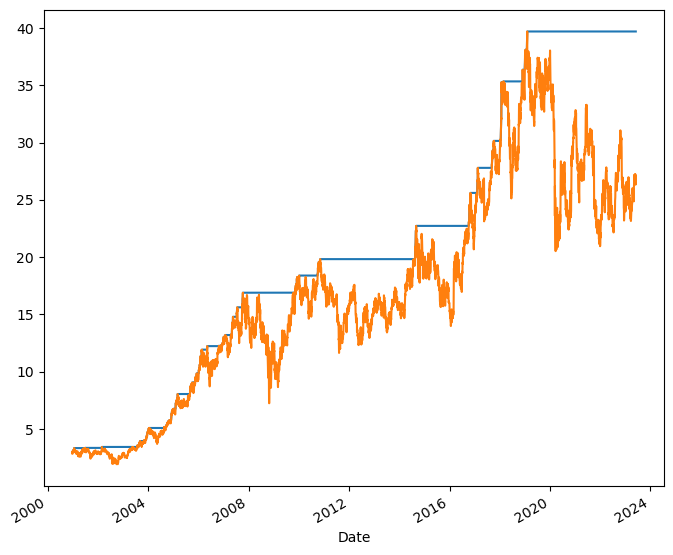

In [5]:
df['peak'].plot(figsize=(8,7))
df['Close'].plot(figsize=(8,7))

In [7]:
df['drawdown'] = ((df['Close'] - df['peak']) / df['peak']) * 100
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,peak,drawdown
Date,,,,,,,,
2000-12-21,2.815505,2.988535,2.815174,2.960552,1.741801,74224,2.960552,0.000000
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.666303,23312,2.960552,-4.334431
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.666303,0,2.960552,-4.334431
2000-12-26,2.816664,2.834712,2.790006,2.831401,1.665816,7851,2.960552,-4.362391
2000-12-27,2.881074,2.927437,2.831401,2.927437,1.722318,26996,2.960552,-1.118538
2000-12-28,2.910879,3.129443,2.864351,3.063211,1.802199,77425,3.063211,0.000000
2000-12-29,3.063211,3.063211,3.063211,3.063211,1.802199,0,3.063211,0.000000
2001-01-01,3.063211,3.063211,3.063211,3.063211,1.802199,0,3.063211,0.000000
2001-01-02,2.906077,2.980256,2.905911,2.963864,1.743749,47010786,3.063211,-3.243227


<Axes: xlabel='Date'>

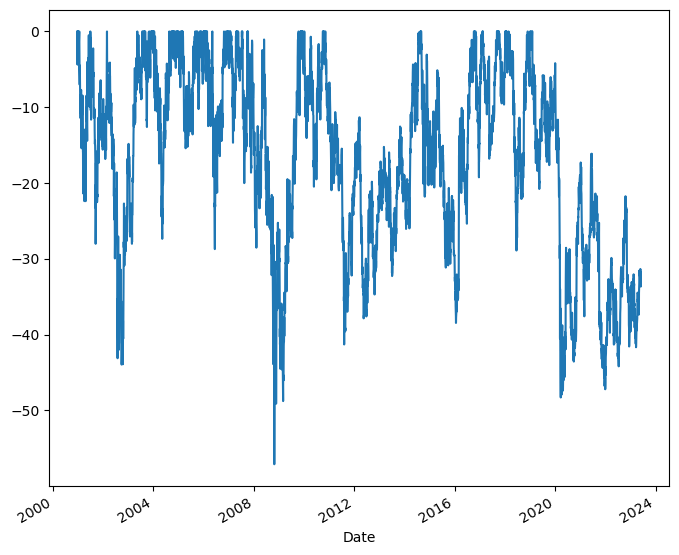

In [8]:
df['drawdown'].plot(figsize=(8,7))

In [9]:
df['drawdown'].min()

-57.10784155950079

In [10]:
df[df['drawdown'] == -57.10784155950079]

,Open,High,Low,Close,Adj Close,Volume,peak,drawdown
Date,,,,,,,,
2008-10-24,7.347568,7.653890,6.999853,7.244082,4.261957,20629666,16.889059,-57.107842
2008-10-27,7.244082,7.678727,7.003992,7.244082,4.261957,17618898,16.889059,-57.107842


In [41]:
#descobrir porque nao funcionou
def status(drawdown):

    if drawdown < 0 and drawdown.shift(1) == 0:
        return 'inicio drawdown'

    elif drawdown < 0 and drawdown.shift(1) < 0:
        return 'drawdown em andamento'

    elif drawdown == 0 and drawdown.shift(1) < 0:
        return 'fim do drawdown'

    elif drawdown == 0 and drawdown.shift(1) == 0:
        return 'renovando pico' 

In [11]:

df['status'] = np.nan

for i in range(len(df)):
    if df['drawdown'].iloc[i] < 0 and df['drawdown'].shift(1).iloc[i] == 0:
        df['status'].iloc[i] = 'inicio drawdown'

    elif df['drawdown'].iloc[i] < 0 and df['drawdown'].shift(1).iloc[i] < 0:
        df['status'].iloc[i]  = 'drawdown em andamento'

    elif df['drawdown'].iloc[i] == 0 and df['drawdown'].shift(1).iloc[i] < 0:
        df['status'].iloc[i]  = 'fim do drawdown'

    elif df['drawdown'].iloc[i] == 0 and df['drawdown'].shift(1).iloc[i] == 0:
        df['status'].iloc[i]  = 'renovando pico' 

df['status'][-1] = 'ultimo dia'

C:\Users\joaog\AppData\Local\Temp\ipykernel_6416\418736412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'].iloc[i] = 'inicio drawdown'


In [113]:
df.tail(15)

,Close,picos,drawdown,status
Date,,,,
2023-05-12,26.910000,39.689999,-32.199545,drawdown em andamento
2023-05-15,27.010000,39.689999,-31.947591,drawdown em andamento
2023-05-16,26.920000,39.689999,-32.174349,drawdown em andamento
2023-05-17,27.190001,39.689999,-31.494075,drawdown em andamento
2023-05-18,27.090000,39.689999,-31.746029,drawdown em andamento
2023-05-19,26.870001,39.689999,-32.300323,drawdown em andamento
2023-05-22,26.360001,39.689999,-33.585282,drawdown em andamento
2023-05-23,26.570000,39.689999,-33.056184,drawdown em andamento
2023-05-24,26.420000,39.689999,-33.434112,drawdown em andamento


In [13]:
ls_dd_counter = []
df_dd_final = {'n_dias':[], 'dd_max':[]}

for i in range(len(df)):
    if (df['status'].iloc[i] == 'inicio drawdown') or (df['status'].iloc[i] == 'drawdown em andamento'):
        ls_dd_counter.append(df['drawdown'].iloc[i])

    elif df['status'].iloc[i] == 'fim do drawdown':
        df_dd_final['n_dias'].append(len(ls_dd_counter))
        df_dd_final['dd_max'].append(min(ls_dd_counter))
        ls_dd_counter = []

    elif df['status'].iloc[i] == 'ultimo dia':
        df_dd_final['n_dias'].append(len(ls_dd_counter))
        df_dd_final['dd_max'].append(min(ls_dd_counter))
        ls_dd_counter = []  

In [15]:
dd_final = pd.DataFrame.from_dict(df_dd_final)
dd_final['dd_max'] = abs(dd_final['dd_max'])
dd_final.head(30)

,n_dias,dd_max
0,4,4.362391
1,1,3.243227
2,7,2.100111
3,114,22.388080
4,171,28.019830
5,314,43.961358
6,50,8.937192
7,8,4.672926
8,8,3.653728
9,3,2.272745


In [118]:
dd_final.describe()

,n_dias,dd_max
count,106.00000,106.000000
mean,51.04717,7.063660
std,156.43994,10.955758
min,1.00000,0.088164
25%,2.00000,1.187364
50%,5.00000,2.885391
75%,17.75000,6.395110
max,1073.00000,57.107842


<Axes: >

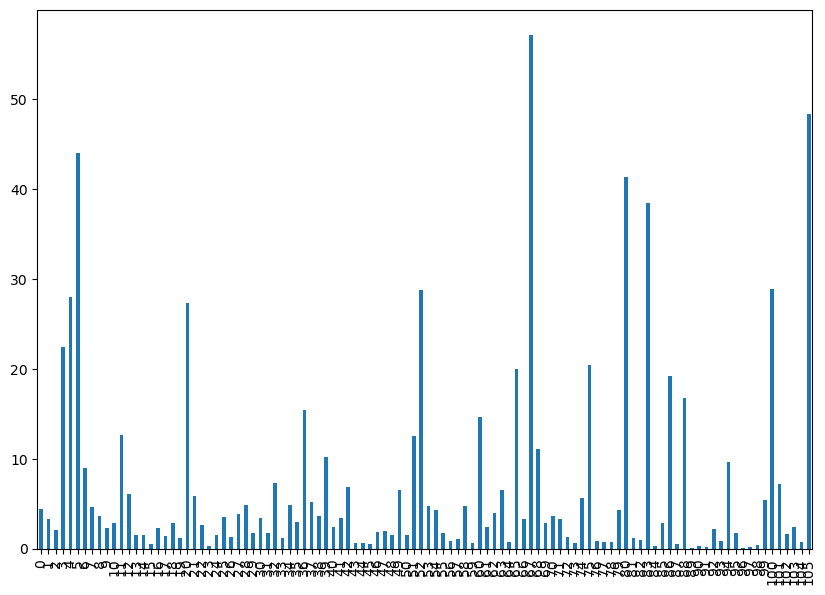

In [140]:
dd_final['dd_max'].plot(kind='bar', figsize=(10,7))

In [134]:
dd_final_acima_10 = dd_final.loc[dd_final['dd_max'] > 10]
dd_final_acima_10.describe()

,n_dias,dd_max
count,20.000000,20.000000
mean,241.700000,25.876889
std,296.056911,13.538622
min,16.000000,10.237669
25%,55.500000,15.228657
50%,131.500000,21.434259
75%,219.500000,31.295513
max,1073.000000,57.107842


In [135]:
dd_final_acima_25 = dd_final.loc[dd_final['dd_max'] > 25]
dd_final_acima_25.describe()

,n_dias,dd_max
count,9.000000,9.000000
mean,441.000000,38.016208
std,351.233185,10.603408
min,120.000000,27.361553
25%,171.000000,28.720384
50%,314.000000,38.465084
75%,519.000000,43.961358
max,1073.000000,57.107842


<Axes: >

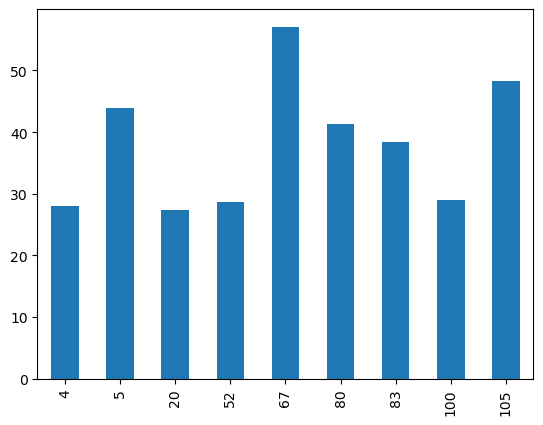

In [141]:
dd_final_acima_25['dd_max'].plot(kind='bar')

In [100]:
df.head(50)

,Close,picos,drawdown,status
Date,,,,
2000-12-21,2.960552,2.960552,0.000000,NaN
2000-12-22,2.832229,2.960552,-4.334431,inicio drawdown
2000-12-25,2.832229,2.960552,-4.334431,drawdown em andamento
2000-12-26,2.831401,2.960552,-4.362391,drawdown em andamento
2000-12-27,2.927437,2.960552,-1.118538,drawdown em andamento
2000-12-28,3.063211,3.063211,0.000000,fim do drawdown
2000-12-29,3.063211,3.063211,0.000000,renovando pico
2001-01-01,3.063211,3.063211,0.000000,renovando pico
2001-01-02,2.963864,3.063211,-3.243227,inicio drawdown


In [76]:
ls = []

In [77]:
max(ls)

ValueError: max() arg is an empty sequence

In [72]:
import numpy as np

In [73]:
np.mean(ls)

3.0

In [66]:
max(ls)

5

In [50]:
df_dd_contador

{'drawdown_contador': [-4.334430847544847,
  -3.2432267090119127,
  -2.1001110455286667,
  -3.4826078786763413,
  -1.2376296202520096,
  -1.2077353829467816,
  -1.9323501796129277,
  -1.635520354212024,
  -1.8431696343899808,
  -0.45455286233802755,
  -1.2987099606555983,
  -1.8907389023142533,
  -2.1828667033878886,
  -1.2182125246829008,
  -1.55213224296135,
  -0.4699197140992664,
  -1.1152491972912164,
  -1.3937893743315732,
  -0.3472179169404826,
  -1.1513297030596816,
  -2.931587932910585,
  -1.992121387085974,
  -0.3115225949426652,
  -0.151513260726466,
  -1.4911185540524332,
  -1.1869289128742597,
  -0.17751927602374254,
  -0.11257714789482977,
  -0.6896499218560055,
  -1.698985539172337,
  -0.4862857528127911,
  -1.4778423309035296,
  -1.2279081835324264,
  -0.9132436903913348,
  -1.9823872144015862,
  -1.2930996494692386,
  -0.41152931522707054,
  -1.236432438381028,
  -0.8142142274221392,
  -0.1828130657957512,
  -2.3555009450848905,
  -3.2201912178079626,
  -1.4129460276357

In [20]:
ls_dd = []
ls_dd2 = []

for i in range(len(df)):
    if df['drawdown'].iloc[i] < 0:
        ls_dd.append(df['drawdown'].iloc[i])
    elif (df['drawdown'].iloc[i] == 0) and (df['drawdown'].shift(1).iloc[i] < 0):
        ls_dd2.append(ls_dd.min())
        ls_dd = []




AttributeError: 'list' object has no attribute 'min'

In [15]:
df.head(30)

,Close,picos,drawdown,inicio_dd
Date,,,,
2000-12-21,2.960552,2.960552,0.000000,False
2000-12-22,2.832229,2.960552,-4.334431,True
2000-12-25,2.832229,2.960552,-4.334431,False
2000-12-26,2.831401,2.960552,-4.362391,False
2000-12-27,2.927437,2.960552,-1.118538,False
2000-12-28,3.063211,3.063211,0.000000,False
2000-12-29,3.063211,3.063211,0.000000,False
2001-01-01,3.063211,3.063211,0.000000,False
2001-01-02,2.963864,3.063211,-3.243227,True


In [ ]:
def gatilho(renovou):
    cond1 = renovou.shift(1) == True
    cond2 = renovou == False
    return(cond1 & cond2)

In [ ]:
df['gatilho'] = gatilho(df['renovou'])

In [ ]:
import numpy as np

In [ ]:
1 += 1

In [ ]:
count = 0

df['teste'] = np.nan
for i in range(len(df)):
    if (df['gatilho'].iloc[i] == True) and (df['renovou'].iloc[i] == False) and (count==0):
        count =1
        df['teste'].iloc[i] = 1 

    elif (count==1) and (df['renovou'].iloc[i] == False):
        df['teste'].iloc[i] = 1


In [ ]:
df.head(30)

In [ ]:
df['drawdown'].expanding().min()

In [ ]:
count = 0
ls_drawdowns = []
while df['gatilho'] == False:
    dd_max = df['drawdown'].expanding().min()
    ls_drawdowns.append(dd_max)

In [ ]:
df.head(30)